# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3
# YOUR CODE HERE!

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
import json
my_btc_price = requests.get(btc_url).json()
print(json.dumps(my_btc_price, indent = 4))
# Fetch current ETH price
# YOUR CODE HERE!
my_eth_price = requests.get(eth_url).json()
print(json.dumps(my_eth_price, indent = 4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19111281,
            "total_supply": 19111281,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 23308.0,
                    "volume_24h": 39203018802,
                    "market_cap": 445169459511,
                    "percentage_change_1h": -1.36443149967623,
                    "percentage_change_24h": 2.19940063626666,
                    "percentage_change_7d": 9.76118214491495,
                    "percent_change_1h": -1.36443149967623,
                    "percent_change_24h": 2.19940063626666,
                    "percent_change_7d": 9.76118214491495
                }
            },
            "last_updated": 1659532755
        }
    },
    "metadata": {
        "timestamp": 1659532755,
        "num_cryptoc

In [6]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = float(my_btc) * my_btc_price['data']['1']['quotes']['USD']['price']
my_eth_value = float(my_eth) * my_eth_price['data']['1027']['quotes']['USD']['price']
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27969.60
The current value of your 5.3 ETH is $8795.88


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_api_secret_key =os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(alpaca_api_key, alpaca_api_secret_key, api_version = 'v2')


In [11]:
# Format current date as ISO format
# YOUR CODE HERE!
curent_date = pd.Timestamp('08/02/2022', tz = 'America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
closing_prices = api.get_bars(tickers, timeframe,curent_date,curent_date).df
closing_prices
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = closing_prices[closing_prices['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY = closing_prices[closing_prices['symbol'] == 'SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!'
closing_prices = pd.concat([AGG,SPY], axis = 1, keys =['AGG','SPY'] )
# Preview DataFrame
# YOUR CODE HERE!
closing_prices

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2022-08-02 04:00:00+00:00  104.27  104.345  103.135  103.16  6866199   

                                                      SPY                 \
                          trade_count        vwap    open   high     low   
timestamp                                                                  
2022-08-02 04:00:00+00:00       38447  103.522777  409.03  413.0  406.82   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-08-02 04:00:00+00:00  408.06  63113622      502751  409.635855

In [13]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = closing_prices['AGG']['close'][0]
spy_close_price = closing_prices['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $103.16
Current SPY closing price: $408.06


In [23]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20403.00
The current value of your 200 AGG shares is $20632.00


### Savings Health Analysis

In [24]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
total_crypto = round(my_btc_value + my_eth_value, 2)
total_shares = my_spy_value + my_agg_value
print(total_crypto)
print(total_shares)
# Create savings DataFrame
# YOUR CODE HERE!
investment_type = ['Crypto','Shares']
df_savings = pd.DataFrame([total_crypto,total_shares], index = [investment_type])
df_savings.columns = ['amount']
# Display savings DataFrame
display(df_savings)

36765.48
41035.0


,amount
Crypto,36765.48
Shares,41035.00


<AxesSubplot:ylabel='amount'>

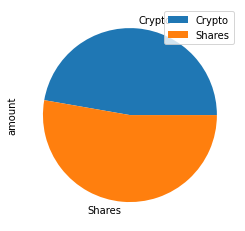

In [25]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', labels = ['Crypto','Shares'])

In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund
# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = round(total_crypto + total_shares, 2)
total_savings
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print(f'Congratulations!! Your savings of ${total_savings} are more than the ideal emergency funds.')
elif total_savings == emergency_fund:
    print(f'Congratulations!! You have achieved your goal of saving ${total_savings}.')
else: 
    print(f'You are ${emergency_fund - total_savings} away from your goal of {emergency_fund}.')

Congratulations!! Your savings of $77800.48 are more than the ideal emergency funds.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [31]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [33]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_bars(tickers, timeframe,start_date,end_date).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis = 1)
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG,SPY], axis = 1, keys = ['AGG','SPY'])
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [42]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
#?MCSimulation
sim_40_60 = MCSimulation(
    portfolio_data = df_stock_data ,
    weights= [.40,.60],
    num_simulation=500,
    num_trading_days=252*30,
)

In [43]:
# Printing the simulation input data
sim_40_60.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [44]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
sim_40_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\MOMO\desktop\fintech\APIs\01-Sessions\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998915,1.005658,0.995273,0.983817,0.996152,1.002162,0.991379,0.989024,1.004486,1.002759,...,1.008747,1.009239,1.004920,0.985442,0.999023,1.000330,1.000834,1.001318,1.009034,0.988056
2,1.007943,1.008034,0.991297,0.990795,1.007378,0.993185,0.984526,0.998972,0.987361,1.006419,...,0.995518,1.011697,1.007631,0.984579,1.002506,1.003833,1.001995,0.997094,1.009434,0.994627
3,1.013563,1.014120,0.997264,0.984867,1.010593,0.988005,0.979012,0.996949,1.001388,0.999010,...,0.997085,1.005248,1.004443,0.982950,0.990080,1.008393,0.998969,0.999295,1.017743,0.989690
4,1.014982,1.003525,1.003981,0.997845,1.029443,0.976384,0.975665,0.993786,1.005060,0.999304,...,0.990826,1.018719,1.005786,0.975876,0.991115,1.011584,0.987242,1.009976,1.027119,0.986937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.467795,11.571065,10.215314,13.853173,21.294116,28.530155,15.441007,4.092861,29.572178,47.445317,...,12.893669,12.977694,14.799308,25.484650,13.936203,26.590432,30.591374,14.514019,16.302823,10.729628
7557,9.547611,11.456054,10.337397,13.945910,21.019604,28.562905,15.561713,4.050905,29.489792,47.272917,...,12.937888,12.955275,14.918525,25.885218,13.919896,26.423795,30.342258,14.587228,16.368029,10.612607
7558,9.414771,11.435229,10.194629,13.899225,20.907093,28.852487,15.474763,4.025709,29.497548,47.394456,...,12.804075,13.056665,14.768529,25.946149,13.917969,26.377226,30.366160,14.714616,16.468668,10.547853
7559,9.421988,11.339175,10.207019,13.889539,20.943206,28.944842,15.558290,4.042021,29.685232,46.383948,...,12.896209,13.068960,14.568258,26.016587,13.991908,26.361273,30.419291,14.764487,16.459406,10.376135


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

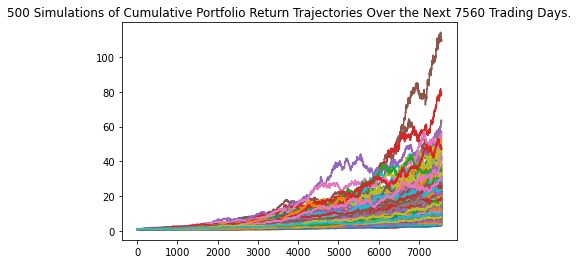

In [45]:
# Plot simulation outcomes
sim_40_60.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

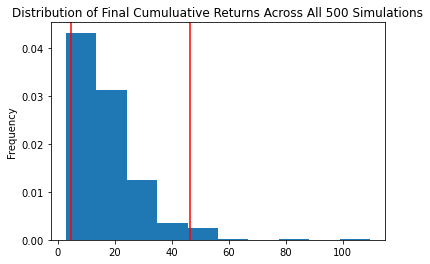

In [46]:
# Plot probability distribution and confidence intervals
sim_40_60.plot_distribution()

### Retirement Analysis

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
sim_40_60_summary = sim_40_60.summarize_cumulative_return()
sim_40_60_summary
# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean             17.486244
std              11.367757
min               2.902986
25%              10.180429
50%              14.378906
75%              22.072027
max             109.690084
95% CI Lower      4.612344
95% CI Upper     46.643893
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [48]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(sim_40_60_summary[8] * initial_investment, 2)
ci_upper = round(sim_40_60_summary[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92246.87 and $932877.86


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [49]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(sim_40_60_summary[8] * initial_investment, 2)
ci_upper = round(sim_40_60_summary[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $138370.31 and $1399316.79


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
sim_40_60_5 = MCSimulation(
    portfolio_data = df_stock_data ,
    weights= [.40,.60],
    num_simulation=500,
    num_trading_days=252*5,
)

In [51]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
sim_40_60_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\MOMO\desktop\fintech\APIs\01-Sessions\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006185,1.011085,1.000523,0.995049,0.985066,1.001186,1.005315,0.998322,1.010064,1.001142,...,1.003960,0.992115,1.002607,1.015707,1.003705,1.006988,0.984829,0.991359,0.998269,1.006934
2,1.005437,1.008311,0.985890,0.973915,0.978121,1.006148,1.003889,0.988774,1.016859,0.993684,...,0.996527,0.990647,1.012378,1.033213,1.003302,1.020830,0.978012,0.980127,0.997768,1.013545
3,1.007704,1.017529,0.984716,0.979745,0.977234,1.014432,1.014466,0.991792,1.013744,0.999182,...,0.998075,0.989466,1.014865,1.033706,1.007105,1.029471,0.963883,0.975278,1.004210,1.009631
4,1.011034,1.015480,0.989135,0.989729,0.968232,1.002262,1.017244,0.988503,1.000014,1.001264,...,1.006966,0.989163,1.015432,1.024609,0.998417,1.025825,0.956817,0.976426,1.001258,1.003401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.540332,1.343763,1.620385,1.291341,1.822136,1.685143,1.479404,1.811668,1.347746,1.822145,...,1.100414,1.937883,2.125702,1.918771,1.549663,2.007409,1.449531,1.516570,1.686379,3.358038
1257,1.545463,1.346325,1.642550,1.294482,1.795400,1.673863,1.471965,1.813114,1.356222,1.820117,...,1.097291,1.935774,2.096381,1.913231,1.569337,1.986855,1.442143,1.533662,1.719687,3.388657
1258,1.547967,1.342383,1.632652,1.295642,1.787166,1.668468,1.472324,1.835171,1.369154,1.830018,...,1.093946,1.959505,2.102560,1.909574,1.576556,1.976824,1.445222,1.527132,1.709182,3.410363
1259,1.556015,1.352612,1.638480,1.308852,1.792311,1.685358,1.461011,1.811253,1.353391,1.836904,...,1.089630,1.971746,2.128298,1.937580,1.583729,1.982477,1.428801,1.526376,1.707309,3.413853


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

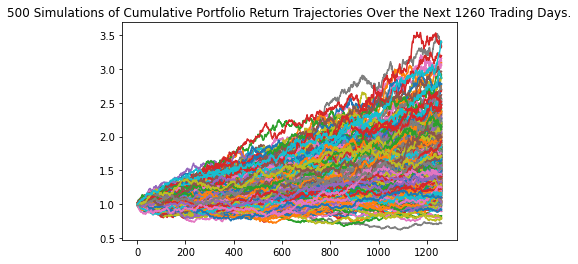

In [52]:
# Plot simulation outcomes
sim_40_60_5.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

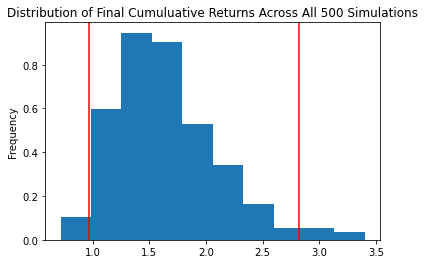

In [53]:
# Plot probability distribution and confidence intervals
sim_40_60_5.plot_distribution()

In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_5yrs = sim_40_60_5.summarize_cumulative_return()
# Print summary statistics
summary_5yrs

count           500.000000
mean              1.651925
std               0.461620
min               0.716420
25%               1.314355
50%               1.587691
75%               1.868416
max               3.401334
95% CI Lower      0.971125
95% CI Upper      2.823444
Name: 1260, dtype: float64

In [67]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_5yrs = round(summary_5yrs[8] * initial_investment, 2)
ci_upper_5yrs = round(summary_5yrs[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yrs} and ${ci_upper_5yrs}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19422.51 and $56468.89


### Ten Years Retirement Option

In [62]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
sim_40_60_10 = MCSimulation(
portfolio_data = df_stock_data,
 weights = [.4,.6],
 num_simulation = 500,
 num_trading_days = 252*10)

In [63]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
sim_40_60_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\MOMO\desktop\fintech\APIs\01-Sessions\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005456,1.000463,0.998181,1.011774,1.002224,1.002905,0.993624,0.995736,0.995665,1.008168,...,1.001250,0.991463,1.008830,0.995295,0.997006,1.006093,0.997847,1.005058,1.011009,1.001381
2,0.998252,1.014436,1.003337,0.997084,1.001646,1.009042,0.990179,0.991628,1.000162,1.006148,...,0.994226,0.994610,1.008478,1.008280,0.996859,1.007783,1.000273,1.008389,1.013193,1.002573
3,1.003144,1.029425,1.002515,0.993133,0.992959,1.016603,0.980453,1.007895,0.995673,1.013637,...,0.995590,0.997187,1.011395,1.004066,0.995920,1.012107,0.991009,1.013379,1.023094,1.004974
4,1.003317,1.026810,0.996191,0.994191,0.992950,1.017381,0.974564,1.003052,0.995921,1.016714,...,1.003291,1.004047,1.015897,1.002552,0.996812,1.017190,0.980217,1.019067,1.029163,1.011760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.243700,1.730678,5.042712,2.019176,3.404286,2.012070,4.062269,3.180621,2.229053,2.509262,...,2.871082,4.794699,2.990859,2.426460,2.026819,2.891486,3.051894,3.012886,3.609953,3.991563
2517,4.216494,1.741035,5.034508,2.006469,3.433985,2.003637,4.107073,3.196076,2.227932,2.492557,...,2.860232,4.834732,2.984146,2.427212,2.023649,2.877279,3.022242,2.989563,3.644512,3.980192
2518,4.247845,1.743836,4.996353,2.002492,3.440108,2.014956,4.130417,3.179885,2.232416,2.484280,...,2.852652,4.822407,3.009091,2.410238,2.018956,2.887592,3.033816,2.997055,3.641355,3.998154
2519,4.232718,1.740748,4.898933,1.996508,3.454361,1.970556,4.103184,3.195868,2.215388,2.448728,...,2.853973,4.812199,2.971980,2.421169,2.005847,2.879670,3.071339,3.034149,3.647521,4.029450


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

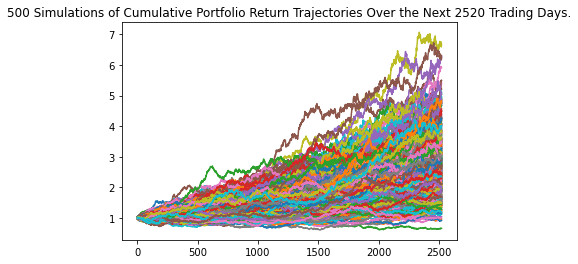

In [64]:
# Plot simulation outcomes
sim_40_60_10.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

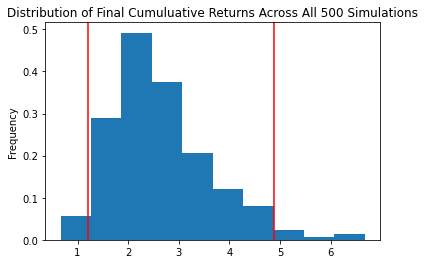

In [65]:
# Plot probability distribution and confidence intervals
sim_40_60_10.plot_distribution()

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_10_yrs = sim_40_60_10.summarize_cumulative_return()
summary_10_yrs
# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              2.657057
std               0.985477
min               0.663430
25%               1.964482
50%               2.460264
75%               3.139309
max               6.678061
95% CI Lower      1.213634
95% CI Upper      4.873677
Name: 2520, dtype: float64

In [68]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(summary_10_yrs[8] * initial_investment, 2)
ci_upper_ten = round(summary_10_yrs[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $24272.68 and $97473.53
